# Visualize MRI Dist.
This notebook shows how to work with the data provided by MOINCC. Import packages

In [38]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

Read data:

In [50]:
file_name = 'FA_20240207_2H_yeast_Fumarate-d2_5.csv'
file_path = '../Data/' + file_name
df = pl.read_csv(file_path) # using polars for more efficient data manipulation
print(df.shape)
display(df.head())

(1632, 131)


shape: (5, 131)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ 2H        ┆ FA_202402 ┆ FA_202402 ┆ FA_202402 ┆ … ┆ FA_202402 ┆ FA_202402 ┆ FA_202402 ┆ FA_20240 │
│ chemical  ┆ 07_2H_yea ┆ 07_2H_yea ┆ 07_2H_yea ┆   ┆ 07_2H_yea ┆ 07_2H_yea ┆ 07_2H_yea ┆ 207_2H_y │
│ shift     ┆ st_1.5.se ┆ st_1.5.se ┆ st_1.5.se ┆   ┆ st_1.5.se ┆ st_1.5.se ┆ st_1.5.se ┆ east_1.5 │
│ (ppm)     ┆ r#1       ┆ r#2       ┆ r#3       ┆   ┆ r#1…      ┆ r#1…      ┆ r#1…      ┆ .ser#1…  │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.58867   ┆ -200.095  ┆ 54.6888   ┆ -49.7546  ┆ … ┆ 123.453   ┆ 38.7938   ┆ 49.7119   ┆ 223.404  │
│ 1.59274   ┆ -170.413  ┆ 34.6691   ┆ -4.13275  ┆ … ┆ 133.794   ┆ -4.99542  ┆ 31.7023   ┆ 211.57   │
│ 1.59682   ┆ -140.335  ┆ 14.6494   ┆ 28.6782   ┆ … ┆ 161.196   ┆ -45.8426  ┆ 13.6927   ┆ 199.737  │
│ 1.60089   ┆ -110.256  ┆ -5.37036  ┆ 50.9775   ┆ … ┆ 188.598   ┆ -81.4596  ┆ -4.31689  ┆ 187.903  │
│ 1.60496   ┆ -91.9619  ┆ -16.7766  ┆ 61.2325   ┆ … ┆ 223.145   ┆ -103.238  ┆ -18.0547  ┆ 188.652  │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

Plot of a single time point of the spectrum:

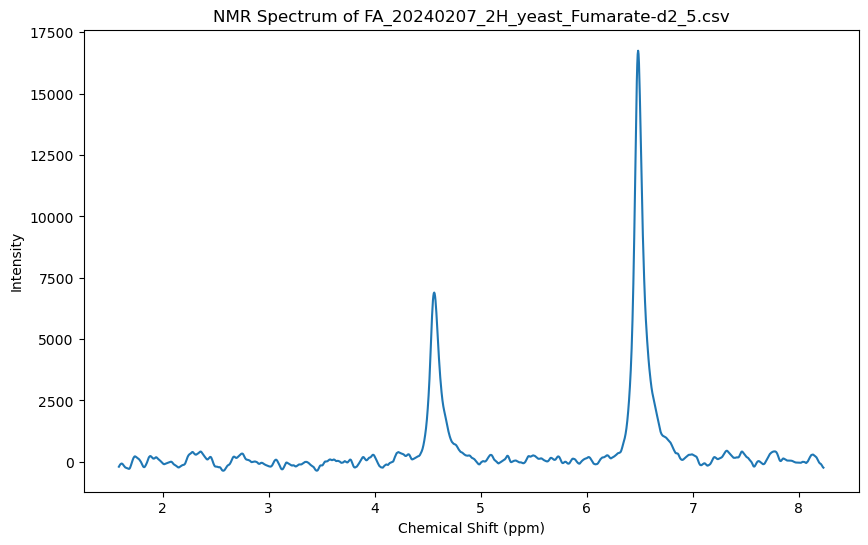

In [41]:
def single_plot(df, y = 1):
    plt.figure(figsize=(10, 6))
    plt.plot(df[:, 0], df[:, y])
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Intensity')
    plt.title(f'NMR Spectrum of {file_name}')
    plt.show()

single_plot(df)


Now we want to vizualize the chemical shift over time:

In [47]:
import plotly.express as px
import polars as pl

def animate_plot(df):
    # Melt the dataframe (Polars)
    melted_df = df.melt(id_vars=[df.columns[0]], value_vars=df.columns[1:])
    display(melted_df)
    # Rename the columns for better understanding
    melted_df = melted_df.rename({
        df.columns[0]: 'Chemical Shift (ppm)',  # First column
        'variable': 'Time',  # The original column names (used as time points)
        'value': 'Intensity'  # The melted values (intensities)
    })
    
    # Convert the Polars DataFrame to a Pandas DataFrame for compatibility with Plotly
    melted_df = melted_df.to_pandas()

    # Create an animated line plot
    fig = px.line(
        melted_df,
        x='Chemical Shift (ppm)',  # x-axis
        y='Intensity',  # y-axis
        animation_frame='Time',  # Animation frames based on time (columns)
        labels={'Chemical Shift (ppm)': 'Chemical Shift (ppm)', "Intensity": "Intensity"},
        title="NMR Spectrum Animation"
    )

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title="Chemical Shift (ppm)",
        yaxis_title="Intensity",
        width=800,
        height=500
    )
    
    # Show the animated plot
    fig.show()

# Example usage (assuming `df` is a Polars DataFrame)
animate_plot(df)


/tmp/ipykernel_32627/703580211.py:6: DeprecationWarning:

`DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`



shape: (212_160, 3)
┌─────────────────────────┬─────────────────────────────────┬──────────┐
│ 2H chemical shift (ppm) ┆ variable                        ┆ value    │
│ ---                     ┆ ---                             ┆ ---      │
│ f64                     ┆ str                             ┆ f64      │
╞═════════════════════════╪═════════════════════════════════╪══════════╡
│ 1.58867                 ┆ FA_20240207_2H_yeast_1.5.ser#1  ┆ -200.095 │
│ 1.59274                 ┆ FA_20240207_2H_yeast_1.5.ser#1  ┆ -170.413 │
│ 1.59682                 ┆ FA_20240207_2H_yeast_1.5.ser#1  ┆ -140.335 │
│ 1.60089                 ┆ FA_20240207_2H_yeast_1.5.ser#1  ┆ -110.256 │
│ 1.60496                 ┆ FA_20240207_2H_yeast_1.5.ser#1  ┆ -91.9619 │
│ …                       ┆ …                               ┆ …        │
│ 8.21466                 ┆ FA_20240207_2H_yeast_1.5.ser#1… ┆ 58.8224  │
│ 8.21874                 ┆ FA_20240207_2H_yeast_1.5.ser#1… ┆ 60.2038  │
│ 8.22281                 ┆ FA_20240207_2H_yeast_1.5.ser#1… ┆ 61.5851  │
│ 8.22688                 ┆ FA_20240207_2H_yeast_1.5.ser#1… ┆ 51.3687  │
│ 8.23095                 ┆ FA_20240207_2H_yeast_1.5.ser#1… ┆ 30.6485  │
└─────────────────────────┴─────────────────────────────────┴──────────┘

/home/tomruge/anaconda3/envs/env3.12.2/lib/python3.12/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

